# Machine Learning Foundations CAI2100C

## Project 1: Practical Application of a Supervised Learning Model

## Breast Cancer Dectection

### Group:
Ryan NAIDJI <br>
Abdelkrim Innouche <br>
Lucas Lisboa Alves <br>

### Date:
03-05-2025

# The Scenario
“About 1 in 8 U.S. women (about 13%) will develop invasive breast cancer over the course of her lifetime. <br>
In 2021, an estimated 281,550 new cases of invasive breast cancer are expected to be diagnosed in women in the U.S., along with 49,290 new cases of non-invasive (in situ) breast cancer.”<br>

A timely response is crucial so that real invasive cases are treated promptly, while we do not put those in non-invasive cases under unnecessary tests or procedures.<br>
However, there is a crunch on professionals to check on the reports.<br>
Is there a way to overcome this problem?<br>

Source: U.S. Breast Cancer Statistics. BreastCancer Org. https://www.breastcancer.org/symptoms/understand_bc/statistics 

# Tips for working on this project
You will be using these two concepts to be able to successfully complete this project:
1. Supervised Learning models
2. AI Project Cycle <br>

If needed, please revise your notes on these topics.

# Section 1: Understand the Problem

One of the key points of solving an AI problem is to understand the problem statement correctly. <br>
You need to understand what is the correct problems that you are solving.<br>
You want to solve the root problem and not the symptoms.<br>
To do that, you can use tools like 5 Whys, decomposition, and Fish-bone diagram.<br>
You can then write your problem statement.<br>
It may include helpful information, like who is affected, what is the problem, where is it happening, and when does it happen.<br>
need more details to each.<br>

Based on the scenario above, write your problem statement in the cell below!<br>

**##############################################<br>
################### ANSWER ##################<br>
##############################################**

2025 Breast Cancer Projections and Key Facts:
- Expected new cases: 316,950 women (invasive) + 59,080 (DCIS)
- Median diagnosis age: 62 years
- Localized stage diagnoses: 66%
- Current U.S. survivors: >4 million
- Expected mortality: 42,170 women
    
Notable Disparities:
- Less than 1% in men
- 38% higher mortality in Black women
- Higher risk in American Indian/Alaska Native women

Breast cancer affects **1 in 8** U.S. women, with 281,550 invasive and 49,290 non-invasive cases expected in 2021. **Diagnosing these cases quickly and accurately is critical** to ensure timely treatment for invasive cases and avoid unnecessary tests for non-invasive ones. However, the high volume of cases puts pressure on healthcare professionals, leading to delays and potential misdiagnoses.

To solve this, **AI-based supervised learning models can help classify cases more efficiently, reducing workload, improving accuracy, and ensuring patients receive the right care at the right time.**


Project Goal:
Develop a machine learning classification model to predict breast cancer diagnosis (malignant vs. benign) using clinical and pathological features to support healthcare decision-making.


# Section 2: Data Acquisition

Data is the main ingredient for AI model. <br>
Where can you find your data? <br>
Write your answer in the cell below. <br>

In this scenario, you are given a CSV file with the info.<br>
In the cell below, write down which column will serve as a target for your AI model?

**##############################################<br>
################### ANSWER ##################<br>
##############################################**

To find the target feature of our dataset, we first need to perform an exploratory data analysis.

In [1]:
import pandas as pd

df = pd.read_csv("[Dataset]_BreastCancer.csv")

df.head(5)

C:\Users\ryann\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


According to our objective, which is to predict whether a person has cancer or not, the target variable would be **"diagnosis"**.

To determine the possible values of the target variable, we will check each unique value.

In [2]:
print(df["diagnosis"].unique())

['M' 'B']


The two unique values of our target variable are "M" and "B".

**"M" likely represents "Malignant" (cancerous)**<br>
**"B" likely represents "Benign" (non-cancerous)**

In [3]:
# Fixing KNN problem 'NoneType' object has no attribute 'split'
#!pip install threadpoolctl==3.1.0

# 0. Importing libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model 1 : KNN
from sklearn.neighbors import KNeighborsClassifier

# Model 2 : SVC
from sklearn.svm import SVC

# Model 3 : Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,NaN,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Section 3: Data Exploration

We need to clean the data.<br>
we want to make sure the data is clean.<br>
let's see how we can do it using this jupyter notebook<br>

## Any Missing Data?

**##############################################<br>
################### ANSWER ##################<br>
##############################################**

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               1
perimeter_mean             1
area_mean                  0
smoothness_mean            0
compactness_mean           1
concavity_mean             1
concave points_mean        1
symmetry_mean              0
fractal_dimension_mean     3
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              3
compactness_se             4
concavity_se               2
concave points_se          1
symmetry_se                3
fractal_dimension_se       0
radius_worst               1
texture_worst              3
perimeter_worst            0
area_worst                 2
smoothness_worst           1
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

If we want to get the total number of missing values:

In [7]:
print("Total missing values:", df.isnull().sum().sum())

Total missing values: 28


## Fixing Missing Data
There are two methods we can try:<br>
1. remove missing data
2. fill missing data with a pre-set value <br>

In this exercise, we will be using the first method. <br>
If you want to use the second method, you will need to:
1. repeat the steps from the beginning
2. comment out the steps for method 1 so that you do not accidentally run it.

In [8]:
# To fix the problem of missing data, there are two possible methods:

# Option 1 : delete missing data row
df_clean = df.dropna()
df_clean

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.3174,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.2439,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.1440,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


We can check if the missing values have been removed:

In [9]:
print("Total missing values:", df_clean.isnull().sum().sum())

Total missing values: 0


In [10]:
# Option 2 : replace missing data row 
# Your answers here!
# mean_value = df['texture_mean'].mean()
# df["texture_mean"].fillna(value=mean_value, inplace=True)
# df

## Rename the column for Target
Let's rename from diagnosis to target, for better clarity.

In [11]:
df_clean = df_clean.rename(columns={'diagnosis': 'target'})
df_clean.head(5)

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


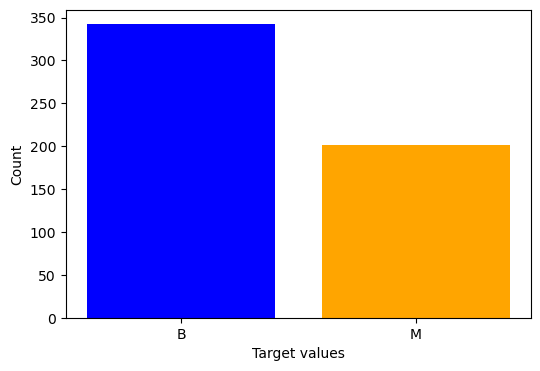

In [12]:
# Can you plot a bar chart to show the number of benign cases (B) and malicious cases (M), using seaborn?
# Your answers here!

counts = df_clean["target"].value_counts()
categories = counts.index
colors = ['blue', 'orange']

plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color=colors)
plt.xlabel("Target values")
plt.ylabel("Count")

plt.show()

In [13]:
print(df_clean.target.value_counts())

target
B    342
M    201
Name: count, dtype: int64


## Change the format for Target
In some of the models, the target need to be in numeric values.<br>
Therefore let's change the format from string to integer.

In [14]:
# Change the variable type for 'target' from string to a numeric variable.
encoder = OneHotEncoder(sparse=False, drop='first')

df_clean["target"] = encoder.fit_transform(df_clean[["target"]]).astype(int)

print("Mapping :")
mapping = {encoder.categories_[0][0]: 0, encoder.categories_[0][1]: 1}
print(mapping)

Mapping :
{'B': 0, 'M': 1}


In [15]:
df_clean

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.3174,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.2439,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.1440,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Seeing the Correlation
In data exploration, it is important to see the correlation between the features.
Can you find the correlations for all the columns?

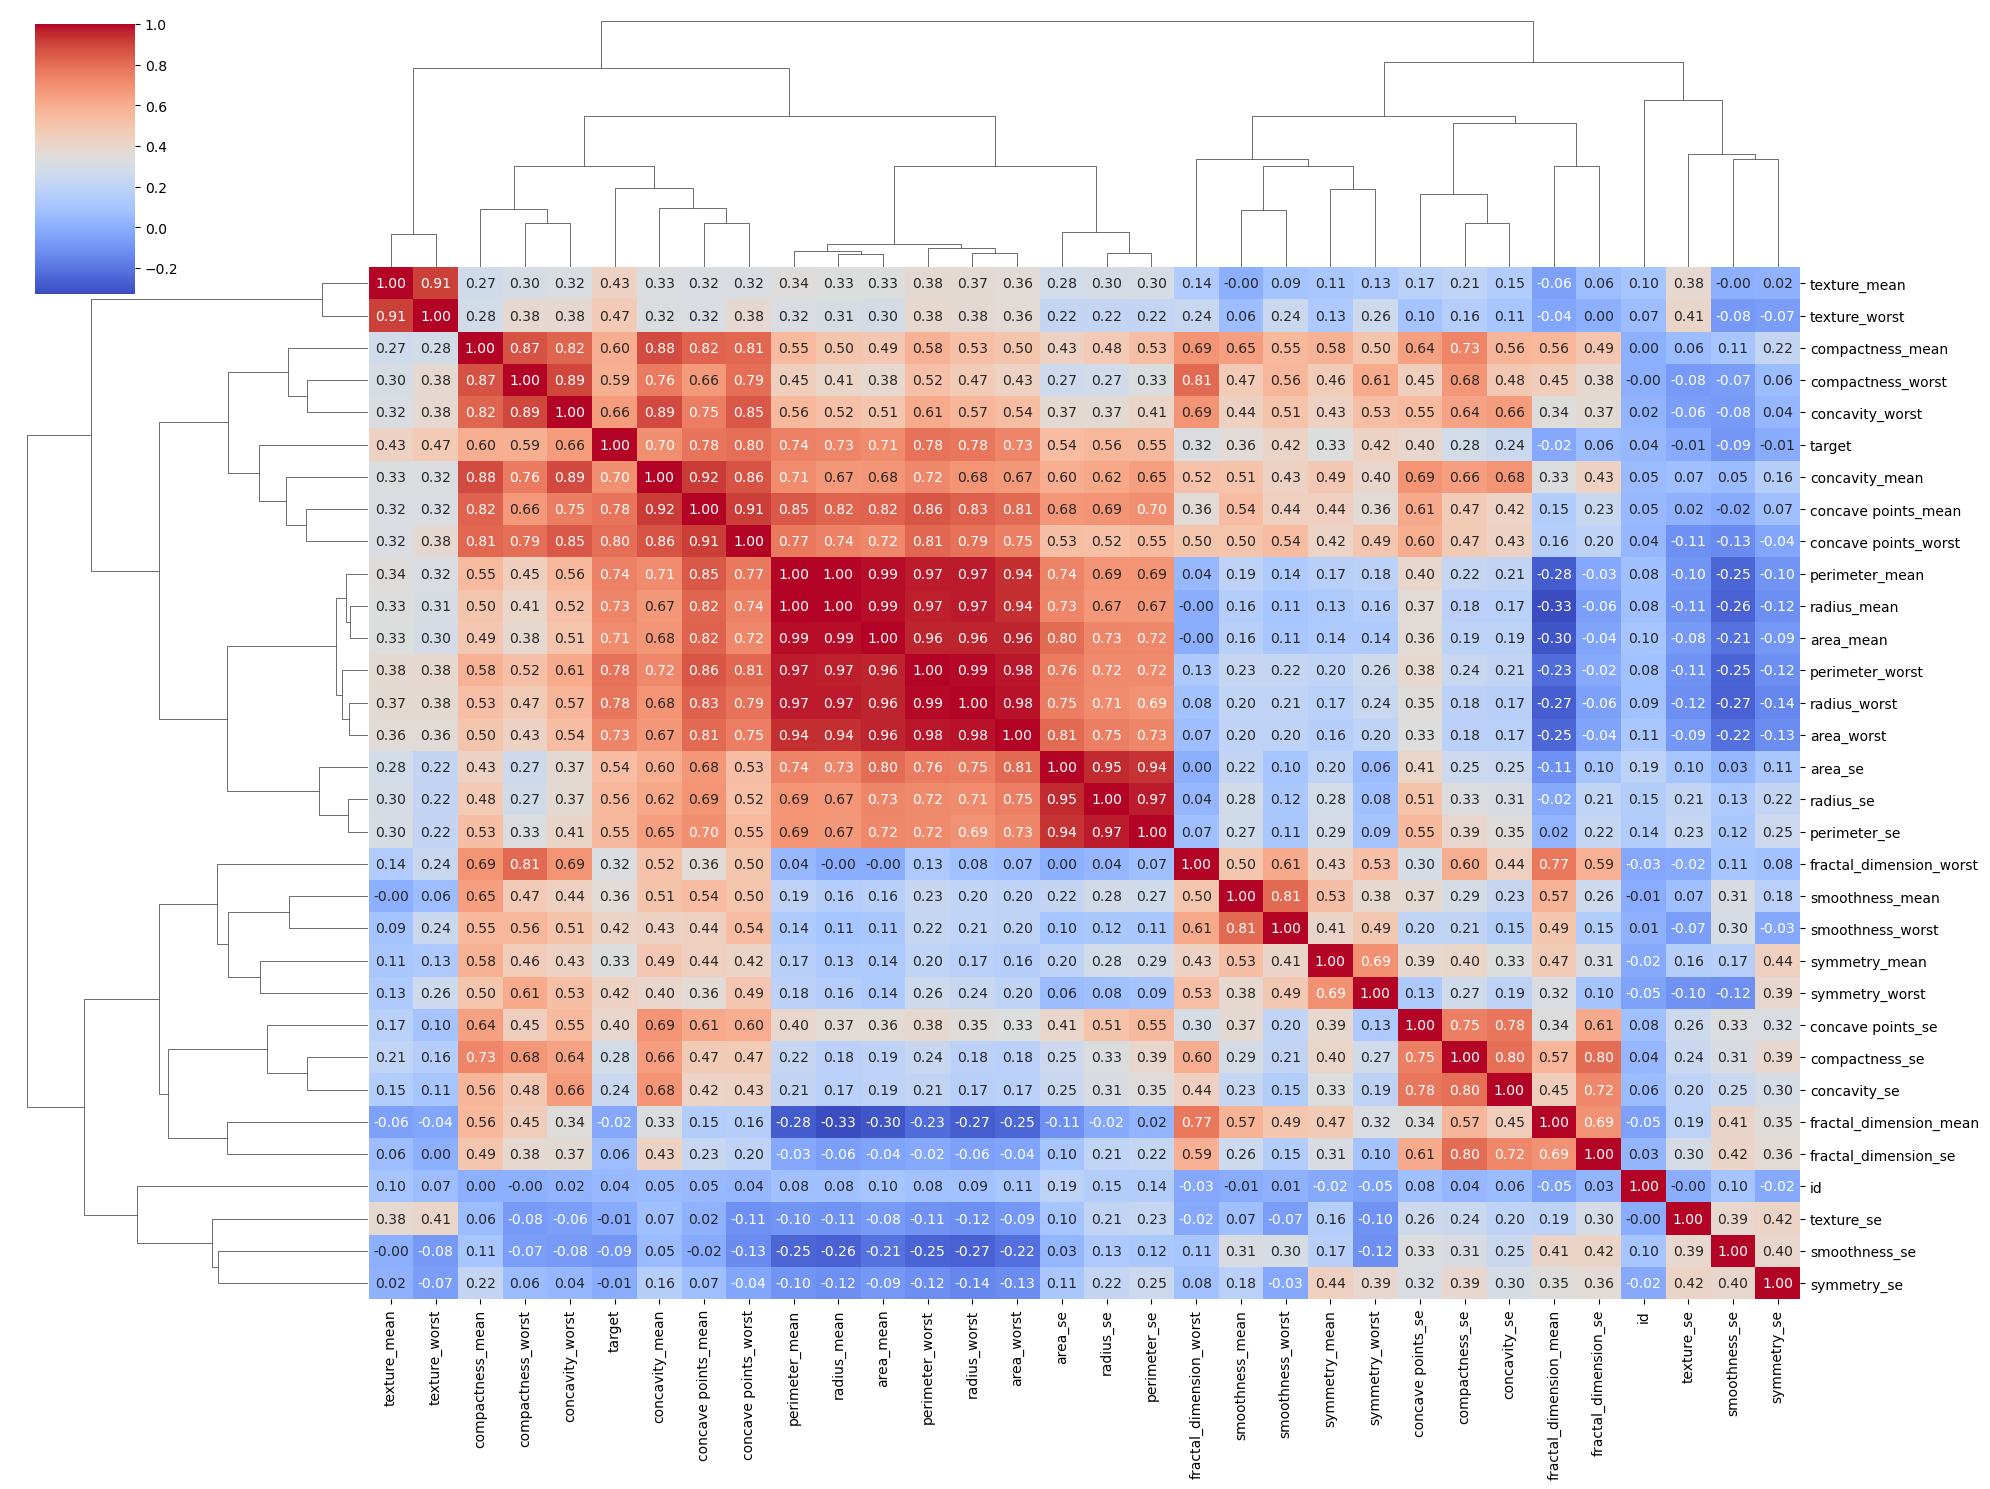

In [16]:
corr = df_clean.corr()
sns.clustermap(corr, annot=True, cmap="coolwarm", fmt=".2f", figsize=(20, 15))
plt.show()

## Finding the top features
The correlation map is too big. It is hard to extract useful information.<br>
Is there a way to filter out and find only those that are relevant for our target?

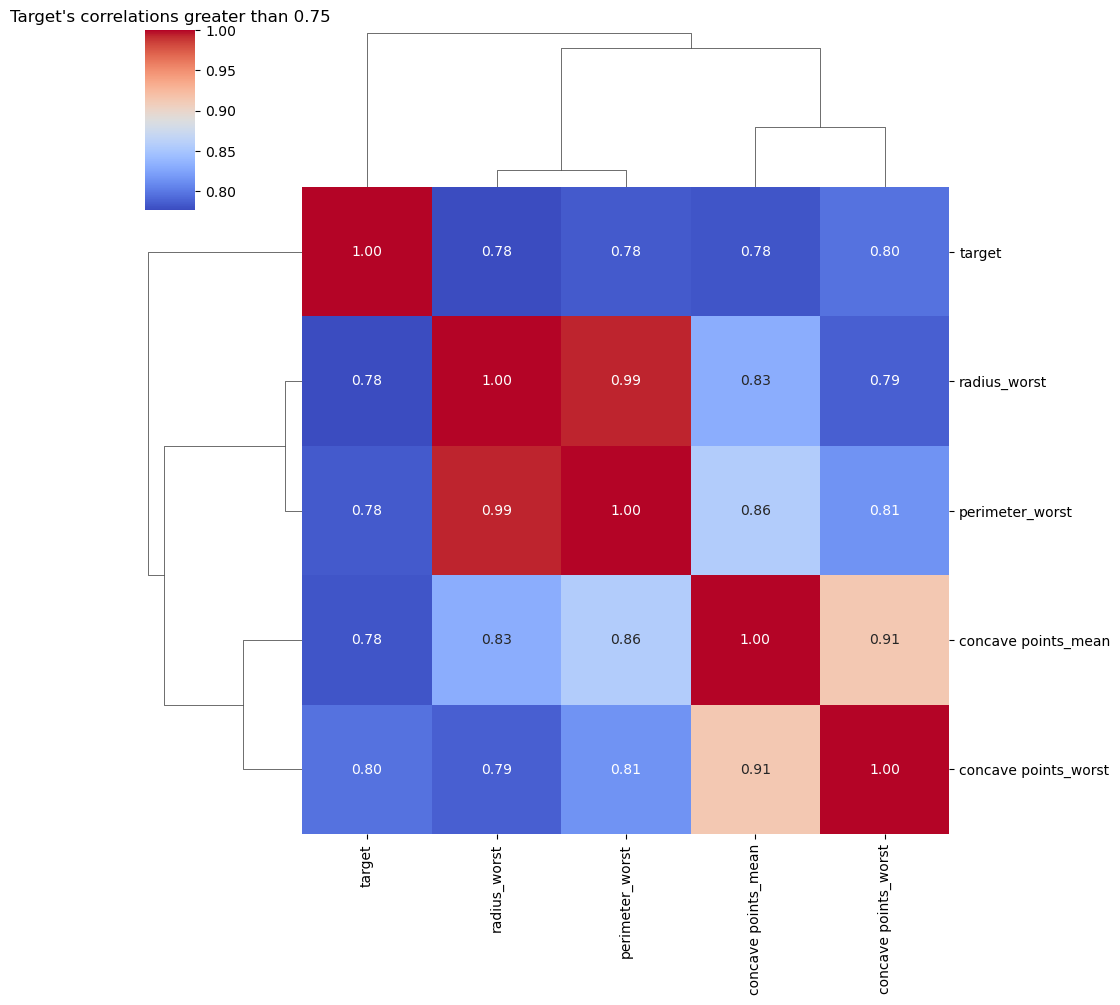

In [17]:
th = 0.75 
corr = df_clean.corr()

filt = np.abs(corr["target"]) > th
top_features = corr.index[filt].tolist()

corr_filtered = corr.loc[top_features, top_features]

sns.clustermap(corr_filtered, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Target's correlations greater than {th}")


plt.show()

In [18]:
# Let's use X to create the data for features
# Let's use y to create the data for target 
# Your answers here!

# Define the feature matrix X by dropping the 'target' column
X = df_clean.drop('target', axis=1)

# Define the target vector y as the 'target' column
y = df_clean['target']


columns = X.columns.tolist()

# Split the data for both training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

X_train.shape: (434, 31)
X_test.shape: (109, 31)


In [19]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# Section 4: Modeling

We will be using 3 models:<br>
1. KNN
2. SVM
3. Decision Tree <br>

We will compare how each one works.<br>
But before that, we will do some preparation first.

In [20]:
# Your answer here! (KNN)

k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)


knn_y_pred_test = knn.predict(X_test_scaled)
knn_y_pred_train = knn.predict(X_train_scaled)

In [21]:
# Your answer here! (SVM)

svc= SVC()
svc.fit(X_train_scaled, y_train)

svc_y_pred_test = svc.predict(X_test_scaled)
svc_y_pred_train = svc.predict(X_train_scaled)

In [22]:
# Your answer here! (Decision Tree)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

dtc_y_pred_test = dtc.predict(X_test_scaled)
dtc_y_pred_train = dtc.predict(X_train_scaled)

# Section 5: Evaluation
We want to check the performance of our model. <br> 
We want to know the accuracy of the results.

Test Score: 0.9266, Train Score: 0.9747
CM: 
 [[68  1]
 [ 7 33]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94        69
           1       0.97      0.82      0.89        40

    accuracy                           0.93       109
   macro avg       0.94      0.91      0.92       109
weighted avg       0.93      0.93      0.93       109



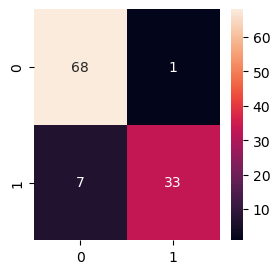

In [23]:
# Your answer here! (KNN)

knn_acc_test = accuracy_score(y_test, knn_y_pred_test)
knn_acc_train = accuracy_score(y_train, knn_y_pred_train)
knn_cm = confusion_matrix(y_test, knn_y_pred_test)


print("Test Score: {}, Train Score: {}".format(round(knn_acc_test,4), round(knn_acc_train,4)))
print("CM: \n",knn_cm)
plt.figure(figsize=(3,3))
sns.heatmap(knn_cm, annot=True)
print(classification_report(y_test, knn_y_pred_test))

Test Score: 0.9633, Train Score: 0.9931
CM: 
 [[69  0]
 [ 4 36]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        69
           1       1.00      0.90      0.95        40

    accuracy                           0.96       109
   macro avg       0.97      0.95      0.96       109
weighted avg       0.97      0.96      0.96       109



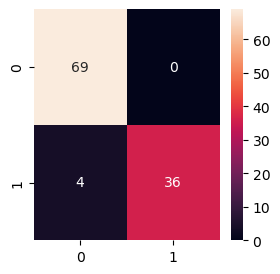

In [24]:
# Your answer here! (SVC)

svc_acc_test = accuracy_score(y_test, svc_y_pred_test)
svc_acc_train = accuracy_score(y_train, svc_y_pred_train)
svc_cm = confusion_matrix(y_test, svc_y_pred_test)


print("Test Score: {}, Train Score: {}".format(round(svc_acc_test,4), round(svc_acc_train,4)))
print("CM: \n",svc_cm)
plt.figure(figsize=(3,3))
sns.heatmap(svc_cm, annot=True)
print(classification_report(y_test, svc_y_pred_test))

Test Score: 0.9266, Train Score: 1.0
CM: 
 [[67  2]
 [ 6 34]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        69
           1       0.94      0.85      0.89        40

    accuracy                           0.93       109
   macro avg       0.93      0.91      0.92       109
weighted avg       0.93      0.93      0.93       109



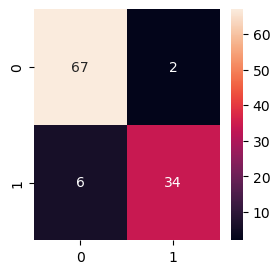

In [25]:
# Your answer here! (Decision Tree)

dtc_acc_test = accuracy_score(y_test, dtc_y_pred_test)
dtc_acc_train = accuracy_score(y_train, dtc_y_pred_train)
dtc_cm = confusion_matrix(y_test, dtc_y_pred_test)


print("Test Score: {}, Train Score: {}".format(round(dtc_acc_test,4), round(dtc_acc_train,4)))
print("CM: \n",dtc_cm)
plt.figure(figsize=(3,3))
sns.heatmap(dtc_cm, annot=True)
print(classification_report(y_test, dtc_y_pred_test))

# What is your best model?
In order to get best model, you will need to modify the parameters. <br>
Look back at the models in section 4, can you fine tune it better? <br><br>
What is your best model? How does it fare?

**The best model is the SVC**

This technique is quite advanced for the scope of this course, but it is the standard approach for finding the best hyperparameters. The goal is to train our models by adjusting the hyperparameters and selecting the combination that yields the highest accuracy score.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV to find the best hyperparameters
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# Best parameters
best_knn = grid_search_knn.best_estimator_
print("Best KNN Parameters:", grid_search_knn.best_params_)

knn_y_pred_test = best_knn.predict(X_test_scaled)
knn_y_pred_train = best_knn.predict(X_train_scaled)

acc_test_knn = accuracy_score(y_test, knn_y_pred_test)
acc_train_knn = accuracy_score(y_train, knn_y_pred_train)

print("Optimized KNN - Test Score:", round(acc_test_knn, 4), "Train Score:", round(acc_train_knn, 4))

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Optimized KNN - Test Score: 0.9541 Train Score: 0.9816


In [27]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(X_train_scaled, y_train)

best_svc = grid_search_svc.best_estimator_
print("Best SVC Parameters:", grid_search_svc.best_params_)

svc_y_pred_test = best_svc.predict(X_test_scaled)
svc_y_pred_train = best_svc.predict(X_train_scaled)

acc_test_svc = accuracy_score(y_test, svc_y_pred_test)
acc_train_svc = accuracy_score(y_train, svc_y_pred_train)

print("Optimized SVC - Test Score:", round(acc_test_svc, 4), "Train Score:", round(acc_train_svc, 4))

Best SVC Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Optimized SVC - Test Score: 0.9541 Train Score: 0.9908


In [28]:
param_grid_dtc = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dtc.fit(X_train_scaled, y_train)

best_dtc = grid_search_dtc.best_estimator_
print("Best Decision Tree Parameters:", grid_search_dtc.best_params_)

dtc_y_pred_test = best_dtc.predict(X_test_scaled)
dtc_y_pred_train = best_dtc.predict(X_train_scaled)

acc_test_dtc = accuracy_score(y_test, dtc_y_pred_test)
acc_train_dtc = accuracy_score(y_train, dtc_y_pred_train)

print("Optimized Decision Tree - Test Score:", round(acc_test_dtc, 4), "Train Score:", round(acc_train_dtc, 4))

Best Decision Tree Parameters: {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 5}
Optimized Decision Tree - Test Score: 0.9174 Train Score: 0.9654


**Even after fine-tuning, SVC remains the best.**

# Section 6: Deployment
What makes a good deployment? <br>
It has to be useful and easy to use. <br>
It needs to be updated frequently and easily.<br>
Deployment can be on-premise or online.<br>

In the cell below, write down your suggestions on how you can deploy this AI model.

 A good deployment of an AI model must be both useful and easy to use.
It should be updated frequently and easily, and it can be deployed on-premise or online.
 
Key points for deployment:
1. Usability:
   - Provide an intuitive interface (e.g., a web app or REST API with FastAPI or Flask).
   - Ensure clear documentation and user guides (with SwaggerUI).
2. Frequent Updates:
   - Implement continuous integration/continuous deployment (CI/CD) pipelines.
   - Using DVC (Data Version Control), a Git repository (Github), MLflow (Track experimentations)
   - Regularly retrain the model with new data (A part of CI/CD workflow).
3. Deployment Options:
   - On-Premise: Ideal for organizations needing strict control over their data.
   - Cloud-Based: Offers scalability, remote accessibility and resilient solutions.
4. Monitoring and Feedback:
   - Monitor the model's performance continuously.
   - Collect user feedback for ongoing improvements.

Based on these considerations, I would deploy this AI model using a cloud-based approach with containerization (using Docker) and orchestration (using Kubernetes or Docker Compose). This setupprovides scalability, easy updates, and accessibility, ensuring that the model remains effective and user-friendly over time.